In [3]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Loading the dataset from a CSV file and printing the first few rows
dataset = pd.read_csv('Social_Network_Ads.csv')
print(dataset.head())

# Extracting features (Age and Estimated Salary) and target variable (Purchased)
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [4]:
# Splitting the dataset into a training set and a test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [5]:
# Importing and applying feature scaling to standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Printing the first three rows of the scaled training data
print(X_train[:3])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]]


In [6]:
# Importing Gaussian Naive Bayes classifier from scikit-learn
from sklearn.naive_bayes import GaussianNB

# Creating an instance of the Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Training the classifier on the scaled training data
classifier.fit(X_train, y_train)


GaussianNB()

In [7]:
# Predicting the test set results using the trained classifier
y_pred = classifier.predict(X_test)

In [8]:
# Importing confusion_matrix function from scikit-learn metrics module
from sklearn.metrics import confusion_matrix

# Generating confusion matrix to evaluate model performance
cm = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print(cm)

[[65  3]
 [ 7 25]]


In [9]:
# Preparing to visualize the results
from matplotlib.colors import ListedColormap

# Setting up the training set data
X_set, y_set = X_train, y_train

# Creating a meshgrid
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

** How accurately our model predicts the classes for the data it was trained on? **

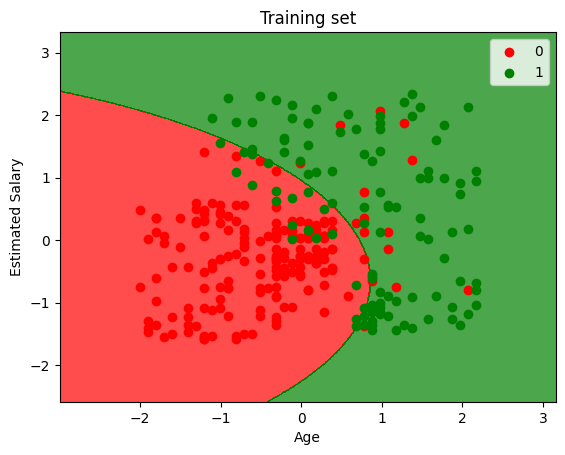

In [10]:
# Using plt.contourf to plot the decision boundary.
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.70, cmap=ListedColormap(('red', 'green')))

# Setting the limits for the x-axis and y-axis based on the meshgrid arrays.
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Looping over unique class labels in y_set.
for i, j in enumerate(np.unique(y_set)):
    # For each class label, scatter plot the data points that belong to that class.
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)

# Adding title, x-axis label, y-axis label, and legend to the plot.
plt.title('Training set')             
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

# Displaying the plot.
plt.show()

** How well our model generalizes to new, unseen data? **

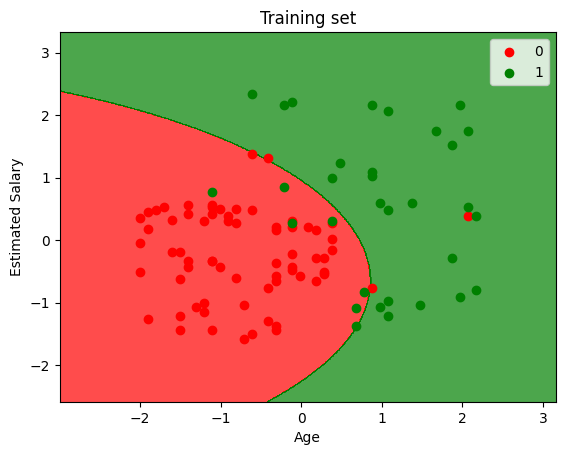

In [11]:
# Visualizing the results
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

# Creating a meshgrid
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# Plotting the decision boundary
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.70, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Training set')             
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
# Display the plot
plt.show()

In [12]:
# Printing the classification report to evaluate the model's performance on the test data.
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



In [ ]:
Precision: How accurate the model is when it predicts a certain class. For example, for class 0, it means that out of all the things the model said were class 0, 90% were actually class 0. For class 1, it's 89%.

Recall: How good the model is at finding all the instances of a certain class. For class 0, it means that out of all the things that were actually class 0, 96% were correctly identified as class 0. For class 1, it's 78%.

F1-score: A combined measure of precision and recall. It gives a single number that represents a balance between them.

Support: How many instances of each class are in the test set.
____________________________________________________________________________________________________
Accuracy: Overall, how often the model is correct.

Macro avg: The average of precision, recall, and f1-score across all classes, without considering class imbalances.

Weighted avg: The weighted average of precision, recall, and f1-score across all classes, considering the support for each class.